Columns in the dataset: Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')
Mean Squared Error: 336.7084241221106
Predicted Demand: 34.243742351427855


<ipython-input-9-09a71c41eff7>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['travel_time'] = pd.to_datetime(df['travel_time'], errors='coerce').dt.hour  # Extract hour
<ipython-input-9-09a71c41eff7>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['travel_date'] = pd.to_datetime(df['travel_date'], errors='coerce')  # Convert to datetime


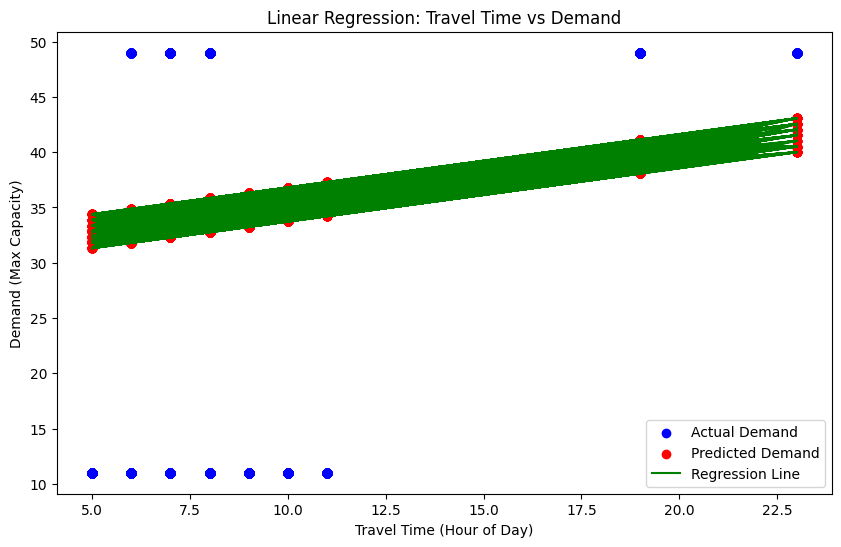

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data from CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/Copy of train_revised.csv'
df = pd.read_csv(file_path)

# Check the columns
print("Columns in the dataset:", df.columns)

# Extract 'hour_of_day' from 'travel_time' and 'day_of_week' from 'travel_date'
df['travel_time'] = pd.to_datetime(df['travel_time'], errors='coerce').dt.hour  # Extract hour
df['travel_date'] = pd.to_datetime(df['travel_date'], errors='coerce')  # Convert to datetime
df['day_of_week'] = df['travel_date'].dt.dayofweek  # Monday=0, Sunday=6

# For 'holiday', create a placeholder column for holidays (all 0 for simplicity)
df['holiday'] = 0

# Features and target variable (assuming 'max_capacity' as a proxy for 'demand')
X = df[['travel_time', 'day_of_week', 'holiday']]
y = df['max_capacity']  # Assuming max_capacity is related to demand

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Example prediction using new data from user input
new_data = pd.DataFrame({'travel_time': [10], 'day_of_week': [1], 'holiday': [0]})
predicted_demand = model.predict(new_data)
print(f'Predicted Demand: {predicted_demand[0]}')

# Plotting the linear regression
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(X_test['travel_time'], y_test, color='blue', label='Actual Demand')
plt.scatter(X_test['travel_time'], y_pred, color='red', label='Predicted Demand')

# Plot the regression line
plt.plot(X_test['travel_time'], y_pred, color='green', label='Regression Line')

plt.title('Linear Regression: Travel Time vs Demand')
plt.xlabel('Travel Time (Hour of Day)')
plt.ylabel('Demand (Max Capacity)')
plt.legend()

plt.show()